The aim of this notebook is to test how well the equations for the incremental update of the mean and standard deviation work. We will generate random normal data, and compare the mean and standard deviation of the generated sample to the estimated ones by updating the values case by case. Incremental update of mean and standard deviation is useful in those cases in which we have to compute these statistics for a large amount of data that does not fit in memory, and also in online systems in which we receive a continuous stream of data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

Creating a sample of 100000 randomly distributed values with mean=3 and standard deviation=2

In [2]:
sample = np.random.normal(loc=3, scale=2, size=100000)
print(sample[:10])

[ 0.45277774  3.62976273  1.03448095  4.09267777  2.92597967  5.75098116
  0.52086648  5.98770605  3.57616025  4.45679452]


What are the mean and standard deviation?

In [3]:
print(np.mean(sample))
print(np.std(sample))

3.01334782418
2.00139962398


Calculating mean and standard deviation incrementally. We start by computing the mean and standard deviation for the 10 first observations, and we update observation by observation. 

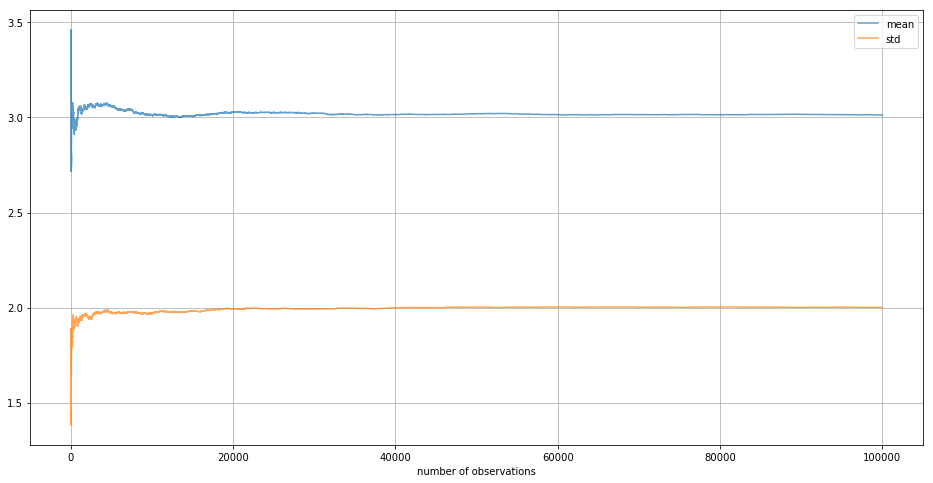

In [4]:
n = 10

mean = [np.mean(sample[:n])]
variance = [np.std(sample[:n])]

while n < sample.size:
    mean.append((mean[n-10]*n + sample[n])/float(n+1))
    variance.append((variance[n-10]*n + (sample[n]-mean[n-10])*(sample[n]-mean[n-9]))/float(n+1))
    
    n = n + 1
    
std = [math.sqrt(i) for i in variance]
    
fig, ax = plt.subplots()
ax.plot(range(10,100001), mean, alpha=0.7)
ax.plot(range(10,100001), std, alpha=0.7)
ax.grid(True)
ax.set_xlabel('number of observations')
ax.legend(['mean', 'std'])
fig.set_figwidth(16)
fig.set_figheight(8)